In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
#reading first file
df=pd.read_csv("measurements.csv")

In [3]:
#reading second file
df2=pd.read_excel("measurements2.xlsx")

In [4]:
#going to use df2 for the analisis since the file is more clean that the other one.

In [5]:
#checking value types
df2.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [6]:
#checking nulls
df2.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [7]:
#droping refill liters & refill gas since more than 90% values are null
df2=df2.drop(columns=["refill liters","refill gas"])

In [8]:
#checking specials values, this column is going to be dropped since values are seperatly in another columns
df2.specials.value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC Sun                 1
half rain half sun     1
ac rain                1
AC snow                1
AC sun                 1
Name: specials, dtype: int64

In [9]:
df2=df2.drop(columns=["specials"])

In [10]:
#checking nulls
df2.isnull().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
AC               0
rain             0
sun              0
dtype: int64

In [11]:
#checking consume relation with every compenonet

In [12]:
#as below table for shorter distances the consume is higher, so short ditances should be avoid.
df2.groupby(["distance","consume"]).sum()

speed  temp_inside  temp_outside  AC  rain  sun
distance consume                                                 
1.3      11.5        21         20.0            10   0     0    0
1.7      10.8        14         21.5            10   0     1    0
2.0      6.0         22         22.5            14   0     0    0
         6.2         20         21.5            10   0     0    0
         8.1         20         22.5            14   0     0    0
...                 ...          ...           ...  ..   ...  ...
130.3    4.6         85         22.0            12   0     0    0
153.5    4.9         82         21.5             3   0     1    0
162.7    5.5         75         23.0             1   0     0    0
211.0    4.6         80         22.0            20   0     0    0
216.1    5.3         90         22.0            21   0     0    1

[320 rows x 6 columns]

<AxesSubplot:xlabel='speed', ylabel='consume'>

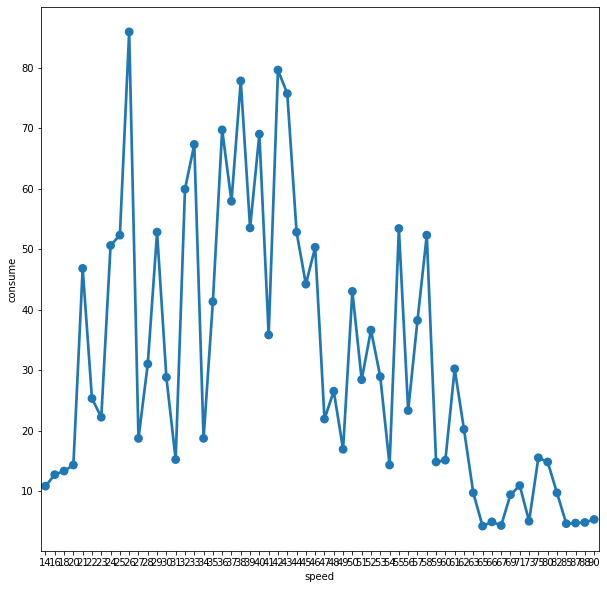

In [20]:
#relation between speed and consume :it seems that for very high speed consumption is increasing significnalty so speeds above 80 should be avoided.
fig=plt.figure(figsize=(10,10))
sns.pointplot(x=df2.groupby('speed').sum().reset_index()['speed'],y=df2.groupby('speed').sum().reset_index()['consume'])

In [17]:
#Checking relation between consume & gas:_type :SP98 is more efficent than E10 
df2.groupby(['gas_type','distance'])['consume'].median()

gas_type  distance
E10       1.7         10.80
          2.0          7.05
          4.1          5.40
          4.2          5.60
          4.5          5.00
                      ...  
SP98      56.1         4.80
          153.5        4.90
          162.7        5.50
          211.0        4.60
          216.1        5.30
Name: consume, Length: 211, dtype: float64

In [37]:
#rainy days has more consumption than normal days
df2.groupby(['rain'])['consume'].agg(['mean', 'median', 'std'])

,mean,median,std
rain,,,
0,4.816176,4.70,0.916388
1,5.593750,5.25,1.480283


In [38]:
#using AC increase consumption significantly
df2.groupby(['AC'])['consume'].agg(['mean', 'median', 'std'])

,mean,median,std
AC,,,
0,4.883520,4.7,0.968629
1,5.256667,4.9,1.600578
